In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 히스토그램과 화질개선
## 임계값 - 전역 임계값과 적응적 임계값

(256, 256, 3)


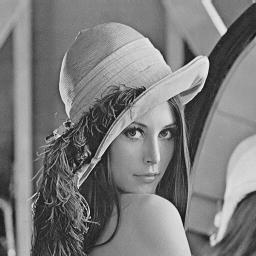

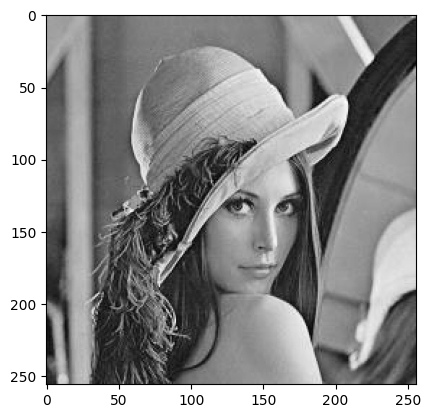

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/lena256.jpg')
print(img.shape)
#cv2_imshow(img)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gimg)
plt.imshow(gimg, cmap='gray')

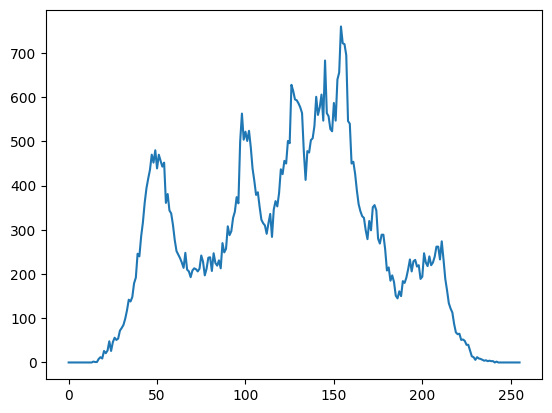

In [ ]:
hist = cv2.calcHist([gimg], [0], None, [256], [0, 255]) # gimg를 [0] 회색영상이므로 한 개의 채널로, None - 마스크 없이, 256개 빔으로, [0, 255] - 0부터 255까지
plt.plot(hist)

(360, 360, 3)


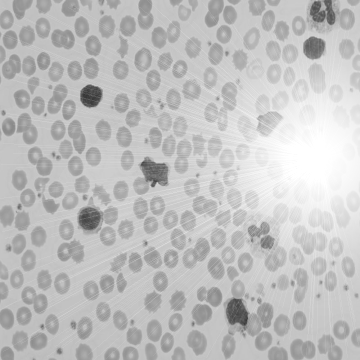

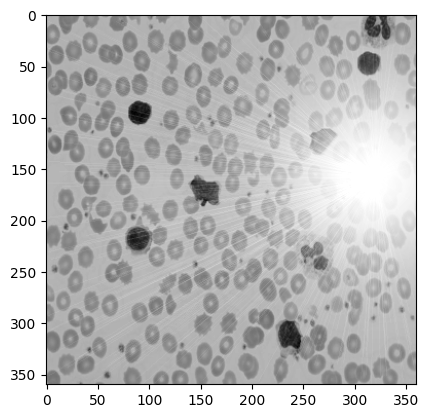

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/cell-bright.bmp')
print(img.shape)
#cv2_imshow(img)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gimg)
plt.imshow(gimg, cmap='gray')

In [ ]:
N = 10 # 블록 지정

dimh = np.int32(gimg.shape[0]/N)
dimw = np.int32(gimg.shape[1]/N)

# 나누어 떨어지지 않는 나머지
dh_rest = np.int32(gimg.shape[0]%N)
dw_rest = np.int32(gimg.shape[1]%N)

meanimg = np.zeros((N, N)) # 각 블록의 임계값(이 경우는 평균)을 저장할 변수
outimg = np.zeros((gimg.shape[0], gimg.shape[1]))


In [ ]:
# 각 블록에서 임계값(평균값) 계산
def mean_function(img, dimh, dimw, h, w):
    count = 1 # 픽셀 계수를 위한 변수, 0으로 나누지 않기 위해 1 할당
    sum = 0
    avg = 0

    for y in range(h, h+dimh):
        for x in range(w, w+dimw):
            sum = sum + img[y, x]
            count = count + 1

    avg = np.int32(sum/count)
    return avg

In [ ]:
# 전체 영상의 임계값
for h in range(0, gimg.shape[0]-dh_rest, dimh): # dimh씩 증가
    for w in range(0, gimg.shape[1]-dw_rest, dimw):
        # N x N 번 도는 루프
        meanimg[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(gimg, dimh, dimw, h ,w) # n번째 블록의 평균값

(10, 10)


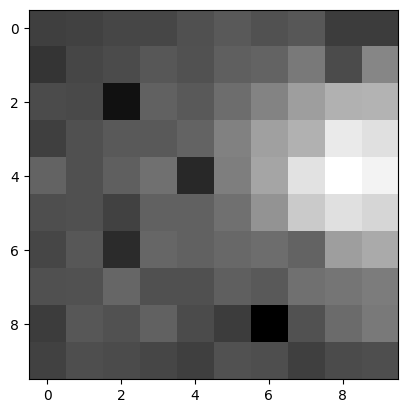

In [ ]:
#cv2_imshow(meanimg)
plt.imshow(meanimg, cmap='gray')
print(meanimg.shape)

In [ ]:
for h in range(0, gimg.shape[0]-dh_rest):
    for w in range(0, gimg.shape[1]-dw_rest):
        if(gimg[h, w] > meanimg[np.int32(h/dimh), np.int32(w/dimw)]):
            outimg[h, w] = 255 # 임계값보다 크면 하얗게
        else:
            outimg[h, w] = 0 # 임게값보다 작으면 검게

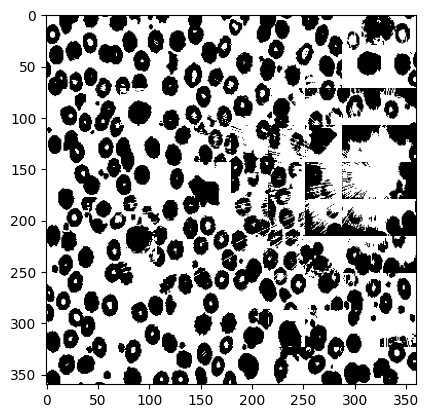

In [ ]:
plt.imshow(outimg, cmap='gray')

## 화질 개선
### 히스토그램 스트레칭

### 히스토그램 평활화